# Parameter Reduction

## Target
Reduce total number of parameters to below 10k
- Maintain max-pooling step at RF of 5x5
- Number of channels for conv layers to be reduced
- Additional parameter expansion to be added post GAP layer (will allow for additional learning)

## Results
- `Total Paratemers:` 7,400
- Best training accuracy: 98.33% at 15th Epoch
- Best testing accuracy: 98.55% at 14th Epoch

## Analysis
- Model learns slowly, and slight underfitting is present.
- Accuracy convergence can be made faster with the addition of Batch Normalization, which we will do in the next step.


## Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/S7'
%cd $BASE_DIR

Mounted at /content/drive
/content/drive/My Drive/S7


In [3]:
from model_2 import Net, model_summary, model_train, model_test, draw_graphs

## Data Transformations

In [4]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [5]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## Dataloaders

In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,152
              ReLU-4           [-1, 16, 24, 24]               0
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6            [-1, 8, 12, 12]             128
            Conv2d-7           [-1, 16, 10, 10]           1,152
              ReLU-8           [-1, 16, 10, 10]               0
            Conv2d-9             [-1, 24, 8, 8]           3,456
             ReLU-10             [-1, 24, 8, 8]               0
        AvgPool2d-11             [-1, 24, 1, 1]               0
           Conv2d-12             [-1, 32, 1, 1]             768
             ReLU-13             [-1, 32, 1, 1]               0
           Conv2d-14             [-1, 1

## Train and Test

In [8]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 1


Loss=2.302335739135742 Batch_id=468 Accuracy=9.52: 100%|██████████| 469/469 [00:18<00:00, 25.29it/s]



Test set: Average loss: 2.3024, Accuracy: 1088/10000 (10.88%)

EPOCH: 2


Loss=2.302312135696411 Batch_id=468 Accuracy=10.17: 100%|██████████| 469/469 [00:18<00:00, 25.33it/s]



Test set: Average loss: 2.3019, Accuracy: 975/10000 (9.75%)

EPOCH: 3


Loss=2.2748286724090576 Batch_id=468 Accuracy=9.75: 100%|██████████| 469/469 [00:18<00:00, 24.72it/s]



Test set: Average loss: 2.2863, Accuracy: 974/10000 (9.74%)

EPOCH: 4


Loss=0.7279479503631592 Batch_id=468 Accuracy=41.22: 100%|██████████| 469/469 [00:17<00:00, 26.38it/s]



Test set: Average loss: 0.6263, Accuracy: 7896/10000 (78.96%)

EPOCH: 5


Loss=0.23258920013904572 Batch_id=468 Accuracy=87.74: 100%|██████████| 469/469 [00:17<00:00, 26.41it/s]



Test set: Average loss: 0.1957, Accuracy: 9416/10000 (94.16%)

EPOCH: 6


Loss=0.14801163971424103 Batch_id=468 Accuracy=93.93: 100%|██████████| 469/469 [00:20<00:00, 23.21it/s]



Test set: Average loss: 0.1441, Accuracy: 9560/10000 (95.60%)

EPOCH: 7


Loss=0.09930149465799332 Batch_id=468 Accuracy=95.40: 100%|██████████| 469/469 [00:17<00:00, 26.10it/s]



Test set: Average loss: 0.1120, Accuracy: 9654/10000 (96.54%)

EPOCH: 8


Loss=0.0409892201423645 Batch_id=468 Accuracy=96.39: 100%|██████████| 469/469 [00:18<00:00, 25.34it/s]



Test set: Average loss: 0.0905, Accuracy: 9720/10000 (97.20%)

EPOCH: 9


Loss=0.0796508863568306 Batch_id=468 Accuracy=97.06: 100%|██████████| 469/469 [00:18<00:00, 25.65it/s]



Test set: Average loss: 0.0786, Accuracy: 9752/10000 (97.52%)

EPOCH: 10


Loss=0.07476982474327087 Batch_id=468 Accuracy=97.34: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]



Test set: Average loss: 0.0736, Accuracy: 9777/10000 (97.77%)

EPOCH: 11


Loss=0.16217519342899323 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:19<00:00, 24.41it/s]



Test set: Average loss: 0.0645, Accuracy: 9799/10000 (97.99%)

EPOCH: 12


Loss=0.05537329241633415 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:18<00:00, 25.55it/s]



Test set: Average loss: 0.0758, Accuracy: 9775/10000 (97.75%)

EPOCH: 13


Loss=0.06730558723211288 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:19<00:00, 24.10it/s]



Test set: Average loss: 0.0552, Accuracy: 9833/10000 (98.33%)

EPOCH: 14


Loss=0.04185575246810913 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:18<00:00, 25.81it/s]



Test set: Average loss: 0.0497, Accuracy: 9855/10000 (98.55%)

EPOCH: 15


Loss=0.06897802650928497 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:18<00:00, 25.47it/s]



Test set: Average loss: 0.0576, Accuracy: 9823/10000 (98.23%)



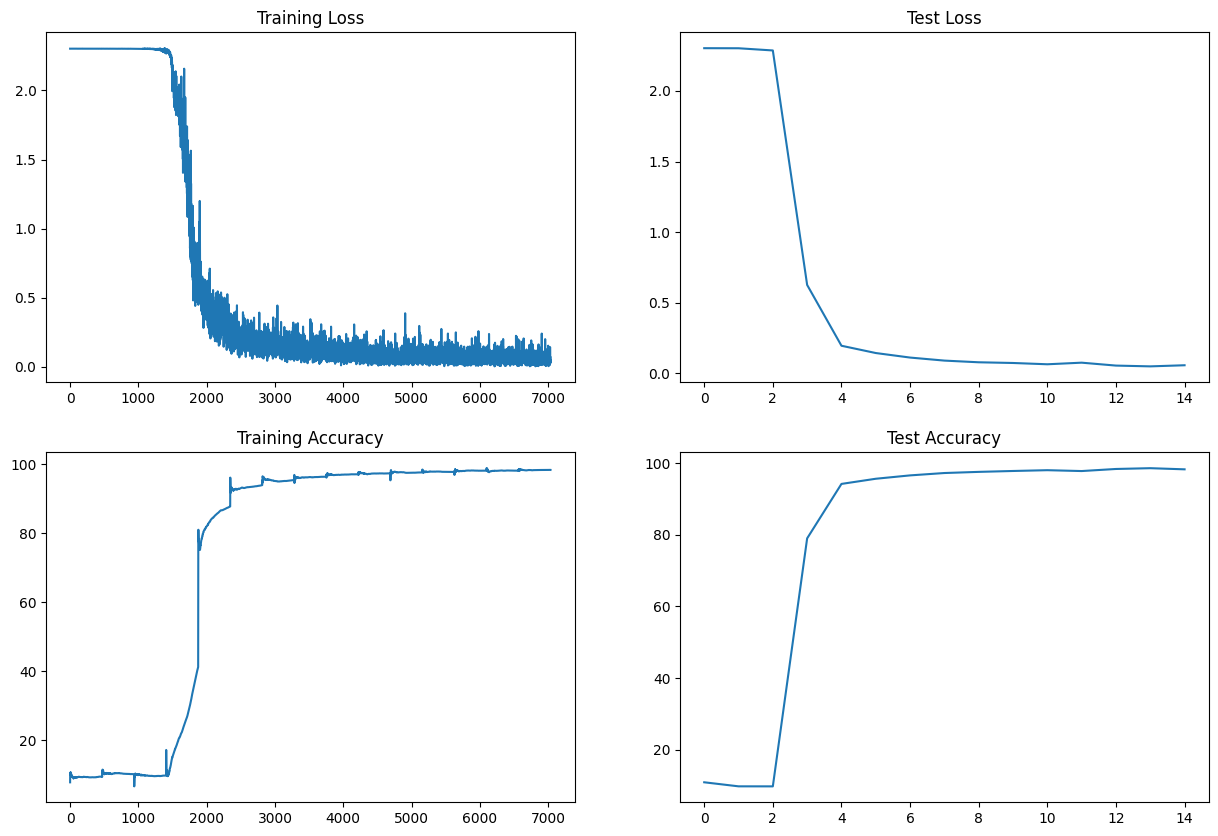

In [9]:
draw_graphs()